In [1]:
# Part 1: Detecting Data Drift in AI/ML Models
# Objective: Understand data drift, how it affects machine learning models, and techniques tomonitor it.

# Task 1: Understanding Data Drift: Study a historical dataset used in training a simple linear regression model and
# compare it with recent unseen data to detect drift.

# Task 2: Monitoring Distribution Changes: Write the code to identify features that exhibit statistical distribution differences.

# Task 3: Visualizing Data Drift: Use visualization techniques to illustrate data drift.






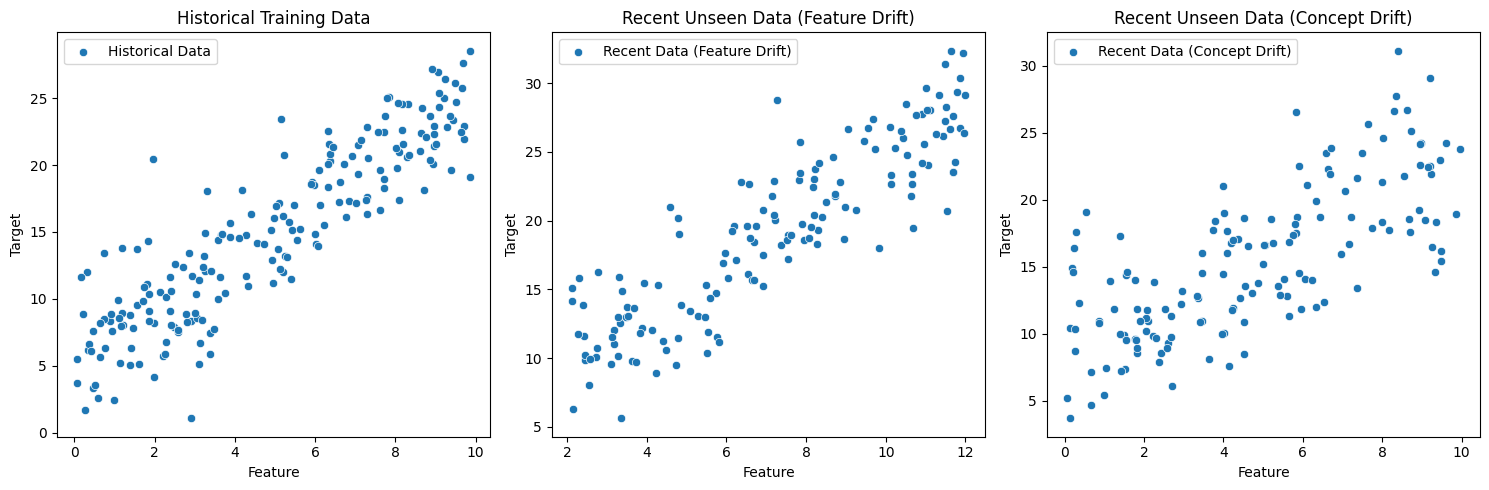


Summary Statistics - Historical Data:
          feature      target
count  200.000000  200.000000
mean     4.840062   14.882367
std      2.948914    6.513150
min      0.055221    1.071227
25%      2.285824    8.930840
50%      4.944863   14.692754
75%      7.568596   20.546558
max      9.868869   28.546004

Summary Statistics - Recent Data (Feature Drift):
          feature      target
count  150.000000  150.000000
mean     7.195904   19.203184
std      3.054385    6.322347
min      2.113536    5.613056
25%      4.500722   13.761172
50%      7.217028   19.392570
75%     10.123141   24.124609
max     11.997177   32.365074

Summary Statistics - Recent Data (Concept Drift):
          feature      target
count  150.000000  150.000000
mean     4.721943   15.402756
std      2.882793    5.595694
min      0.046320    3.704141
25%      2.129222   10.992452
50%      4.515287   14.609079
75%      7.045917   18.681250
max      9.968743   31.113000


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Historical Training Data
np.random.seed(42)
n_train = 200
X_train = np.random.rand(n_train) * 10
y_train = 2 * X_train + 5 + np.random.randn(n_train) * 3
historical_data = pd.DataFrame({'feature': X_train, 'target': y_train})

# 2. Generate Recent Unseen Data with Drift
# Introduce drift in the feature distribution (shifted mean)
n_recent = 150
X_recent_drifted = np.random.rand(n_recent) * 10 + 2  # Mean shifted by +2
y_recent_drifted = 2 * X_recent_drifted + 5 + np.random.randn(n_recent) * 3
recent_data_drifted = pd.DataFrame({'feature': X_recent_drifted, 'target': y_recent_drifted})

# Introduce drift in the relationship between feature and target (concept drift)
n_recent_concept_drift = 150
X_recent_concept = np.random.rand(n_recent_concept_drift) * 10
y_recent_concept = 1.5 * X_recent_concept + 8 + np.random.randn(n_recent_concept_drift) * 4 # Different slope and intercept
recent_data_concept_drift = pd.DataFrame({'feature': X_recent_concept, 'target': y_recent_concept})

# 3. Visualize the Datasets
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='feature', y='target', data=historical_data, label='Historical Data')
plt.title('Historical Training Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.subplot(1, 3, 2)
sns.scatterplot(x='feature', y='target', data=recent_data_drifted, label='Recent Data (Feature Drift)')
plt.title('Recent Unseen Data (Feature Drift)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.subplot(1, 3, 3)
sns.scatterplot(x='feature', y='target', data=recent_data_concept_drift, label='Recent Data (Concept Drift)')
plt.title('Recent Unseen Data (Concept Drift)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

print("\nSummary Statistics - Historical Data:")
print(historical_data.describe())
print("\nSummary Statistics - Recent Data (Feature Drift):")
print(recent_data_drifted.describe())
print("\nSummary Statistics - Recent Data (Concept Drift):")
print(recent_data_concept_drift.describe())

In [3]:
# Part 2: Automating Data Quality Checks
# Objective: Use Python and data quality frameworks to automate validation.

# Task 1: Setting Up Automated Validation with Python

# Task 2: Introduction to Great Expectations: Install the great_expectations package and set up a basic project.

# Task 3: Creating Expectations with Great Expectations: Use Great Expectations to define data validation expectations for a dataset.




In [4]:
import pandas as pd

def check_column_presence(df, expected_columns):
    """Checks if all expected columns are present."""
    missing_columns = set(expected_columns) - set(df.columns)
    if missing_columns:
        return f"FAILED: Missing columns: {', '.join(missing_columns)}"
    return "PASSED: All expected columns present."

def check_column_datatypes(df, expected_dtypes):
    """Checks if column datatypes match expectations."""
    mismatched = {}
    for col, expected in expected_dtypes.items():
        actual = str(df[col].dtype)
        if actual != expected:
            mismatched[col] = f"Expected: {expected}, Actual: {actual}"
    if mismatched:
        return f"FAILED: Datatype mismatches: {mismatched}"
    return "PASSED: All column datatypes as expected."

def check_for_nulls(df, columns_to_check):
    """Checks for null values in specified columns."""
    null_counts = df[columns_to_check].isnull().sum()
    failed_columns = null_counts[null_counts > 0].index.tolist()
    if failed_columns:
        return f"FAILED: Null values found in columns: {failed_columns}"
    return "PASSED: No null values in checked columns."

def check_value_range(df, column, min_val=None, max_val=None):
    """Checks if values in a column are within the specified range."""
    violations = []
    if min_val is not None:
        below_min = df[df[column] < min_val][column].tolist()
        if below_min:
            violations.extend([f"< {min_val}: {below_min}"])
    if max_val is not None:
        above_max = df[df[column] > max_val][column].tolist()
        if above_max:
            violations.extend([f"> {max_val}: {above_max}"])

    if violations:
        return f"FAILED: Value range violations in '{column}': {', '.join(violations)}"
    return f"PASSED: Values in '{column}' are within the expected range."

def run_data_quality_checks(df, expected_columns, expected_dtypes, null_check_columns, value_range_checks):
    """Runs a series of data quality checks and returns the results."""
    results = {}
    results['column_presence'] = check_column_presence(df, expected_columns)
    results['column_datatypes'] = check_column_datatypes(df, expected_dtypes)
    results['null_checks'] = check_for_nulls(df, null_check_columns)
    for column, ranges in value_range_checks.items():
        min_val = ranges.get('min')
        max_val = ranges.get('max')
        results[f'range_check_{column}'] = check_value_range(df, column, min_val, max_val)
    return results

# Sample Data
data = {'id': [1, 2, 3, None, 5],
        'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'age': [25, 30, 22, 35, 40],
        'salary': [50000, 60000, 45000, 70000, 100000]}
df = pd.DataFrame(data)

# Define Expectations
expected_columns = ['id', 'name', 'age', 'salary']
expected_dtypes = {'id': 'float64', 'name': 'object', 'age': 'int64', 'salary': 'int64'}
null_check_columns = ['id', 'name', 'age']
value_range_checks = {'age': {'min': 18, 'max': 65},
                      'salary': {'min': 30000}}

# Run the checks
validation_results = run_data_quality_checks(df, expected_columns, expected_dtypes, null_check_columns, value_range_checks)

# Print Results
print("Automated Data Quality Check Results:")
for check, result in validation_results.items():
    print(f"- {check}: {result}")

Automated Data Quality Check Results:
- column_presence: PASSED: All expected columns present.
- column_datatypes: PASSED: All column datatypes as expected.
- null_checks: FAILED: Null values found in columns: ['id']
- range_check_age: PASSED: Values in 'age' are within the expected range.
- range_check_salary: PASSED: Values in 'salary' are within the expected range.
